# Main Tasks: 
- Describe the degree, betweenness and closeness centrality of the network  
- Identify key influencers 
   - focus on the In_degree
   - pay attention to Out_degree  
- Also, identify the people who are not connected to the network at all

## Step 1: Convert the adjacency matrix to an edge list and a node list

In [1]:
##import necessary packages 
##install pip install dataframe-image
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from pylab import rcParams
import dataframe_image as dfi

In [2]:
##import adjacency matrix 
df = pd.read_csv('Alibaba-network.csv',index_col=0)


In [3]:
##convert adjacency matrix to edgelist dataframe directional
def edgelist(df):
    a = df.values
    c = df.columns
    n = len(c)
    
    c_ar = np.array(c)
    out = np.empty((n, n, 2), dtype=c_ar.dtype)
    
    out[...,0] = c_ar[:,None]
    out[...,1] = c_ar
    
    mask = ~np.eye(n,dtype=bool)
    df_out = pd.DataFrame(out[mask], columns=[['Source','Target']])
    df_out['Weight'] = a[mask]
    return df_out

In [4]:
##create an edge list with all the connections 
edge_df = pd.DataFrame()
edge_df =edgelist(df)
edge_df.columns = edge_df.columns.get_level_values(0)
edge_df_connected = edge_df.query('Weight != 0.0')
edge_df_connected=edge_df_connected[['Source','Target']]
edge_tuple = edge_df_connected.to_records(index=False,column_dtypes = {"Source":"int32", "Target":"int32"})
edges = list(edge_tuple)

In [5]:
#create node list 
nodes = list(df.index)

## Step 2: Describe the network based on centrality measurements 

In [6]:
##create an empty graph 
G = nx.DiGraph()
##load the edges and nodes 
G.add_edges_from(edges)
G.add_nodes_from(nodes)

- ### Betweenness Centrality 

In [7]:
##sort by betweenness centrality 
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
betSet=set(sorted(betCent, key=betCent.get, reverse=True)[:20])
sorted(betCent.items(), key = lambda x: x[1], reverse= True)[:20]

[(162, 0.018783835133464644),
 (4, 0.017096136872509344),
 (311, 0.01569252747094177),
 (78, 0.014323189106379705),
 (293, 0.01368286183601369),
 (461, 0.013546078311123297),
 (303, 0.011370468707536982),
 (29, 0.01104549510224794),
 (198, 0.010699778500876618),
 (1, 0.009753416882514082),
 (135, 0.009574245496064242),
 (277, 0.009316010225996449),
 (46, 0.00915006625733821),
 (414, 0.007572095439426844),
 (187, 0.007164450472940311),
 (39, 0.007012936414600183),
 (6, 0.0066906684174957865),
 (102, 0.006471514154539531),
 (75, 0.006441151218245179),
 (52, 0.005820665074566561)]

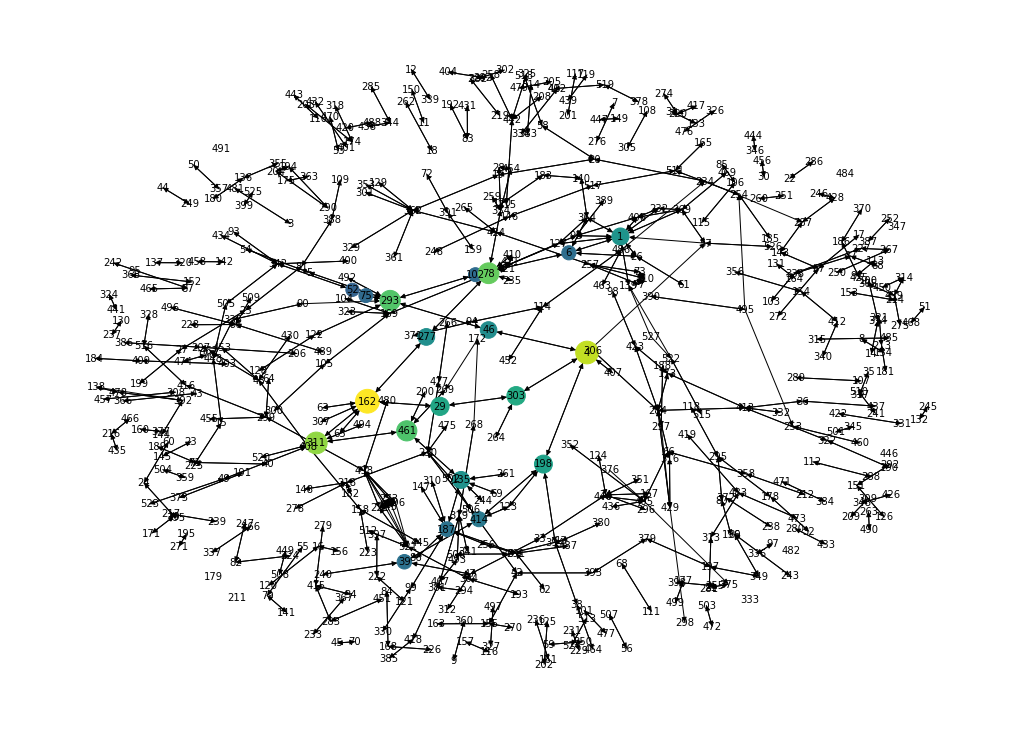

In [8]:
##visualize the network -  betweenness 
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))

high_light_nodes = betSet
node_color = [betCent[v ]* 20000 if v in high_light_nodes else 0 for v in G ]
node_size = [betCent[v ]* 30000 if v in high_light_nodes else 0 for v in G ] 
#node_size = [v * 10000 if k in high_light_nodes else 10 for k,v in zip(G,betCent.values())]

nx.draw(G, pos, node_color=node_color, 
        with_labels=True, 
        node_size=node_size,
        font_size=10,
        linewidths=1)


- ### Closeness Centrality 

In [9]:
##sort by closeness centrality 
cloCent = nx.closeness_centrality(G)
cloSet=set(sorted(cloCent, key=cloCent.get, reverse=True)[:20])
sorted(cloCent.items(), key = lambda x: x[1], reverse= True)[:20]

[(162, 0.0402164375548406),
 (1, 0.039457636846258706),
 (127, 0.03905569147940378),
 (92, 0.03898949539215055),
 (78, 0.03879224668021724),
 (29, 0.03827587734004796),
 (277, 0.03777307435364339),
 (364, 0.03734383487235199),
 (57, 0.036924241222100834),
 (311, 0.036924241222100834),
 (4, 0.036630258409822966),
 (303, 0.036630258409822966),
 (406, 0.03605611642847778),
 (6, 0.03555456303148195),
 (46, 0.03501339768853702),
 (293, 0.03485424588086185),
 (369, 0.034644280544230154),
 (26, 0.03433403325577436),
 (63, 0.033779445347090785),
 (65, 0.033779445347090785)]

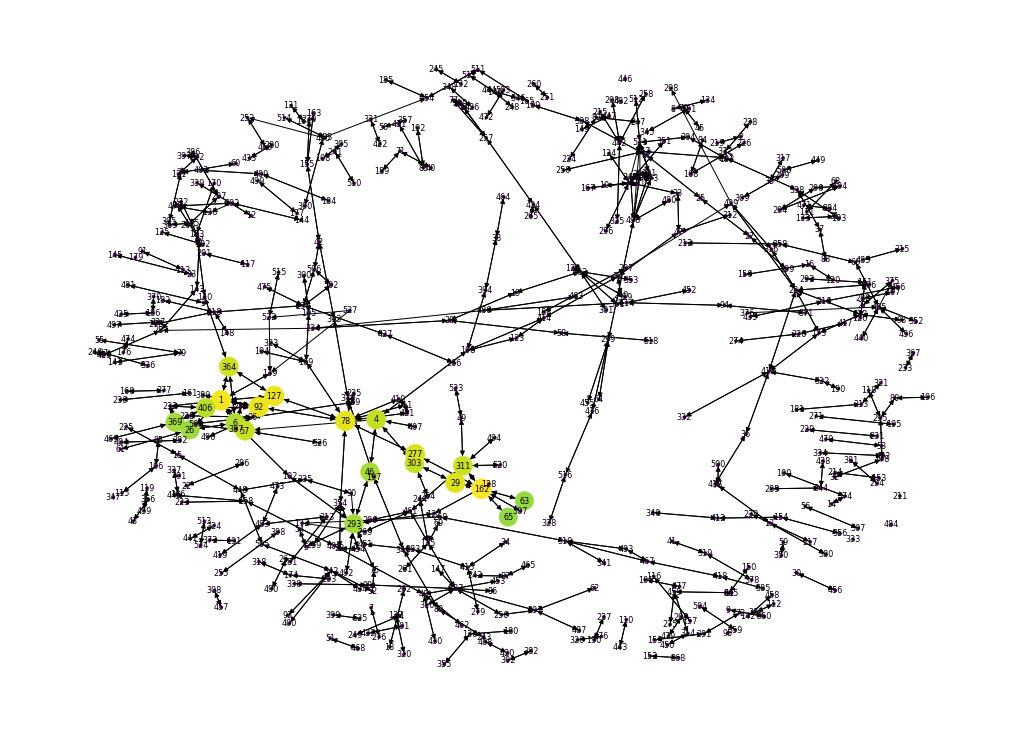

In [10]:
##visualize the network - closeness 
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))

high_light_nodes = cloSet
node_color = [20000.0 * cloCent[v] if v in high_light_nodes else 0 for v in G]
node_size = [10000.0 * cloCent[v] if v in high_light_nodes else 10 for v in G] 

nx.draw(G, pos, node_color=node_color, 
        with_labels=True, 
        node_size=node_size,
        font_size=8,
        linewidths=0.5)

- ### In Degree

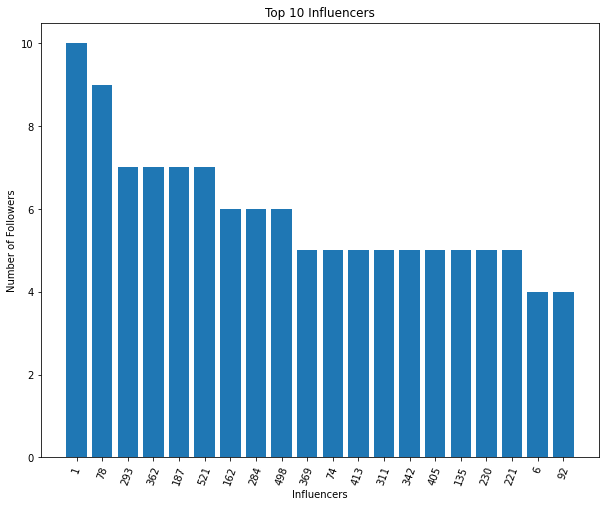

In [11]:
##Top 20 influencers based on the number of followers. 
top10_influenceres=sorted(G.in_degree, key=lambda x: x[1], reverse=True)[:20]
rcParams['figure.figsize'] = 10, 8
plt.bar(range(len(top10_influenceres)), [val[1] for val in top10_influenceres], align='center')
plt.xticks(range(len(top10_influenceres)), [val[0] for val in top10_influenceres])
plt.xticks(rotation=70)
plt.title('Top 10 Influencers')
plt.xlabel('Influencers')
plt.ylabel('Number of Followers')
plt.savefig('Top10Influencers')
plt.show()


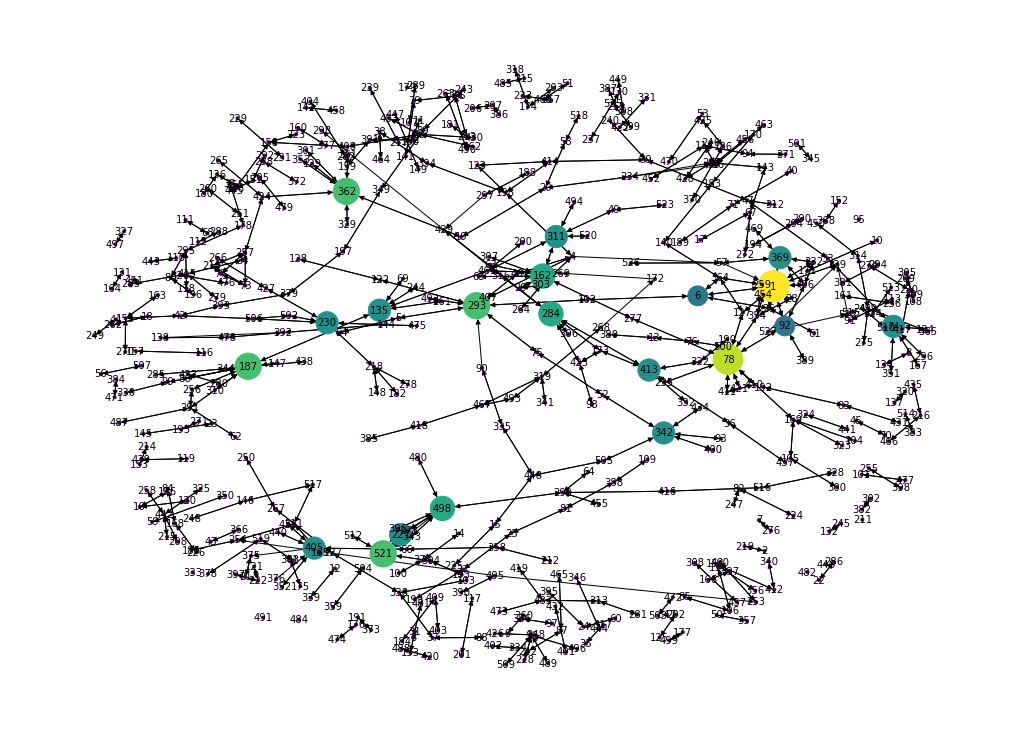

In [12]:
##visualize the network - in degree - most interested factor
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))

high_light_nodes = [val[0] for val in top10_influenceres]
node_color = [20000.0 * G.in_degree(v) if v in high_light_nodes else 0 for v in G]
node_size = [100.0 * G.in_degree(v) if v in high_light_nodes else 10 for v in G] 
#node_size = [v * 10000 if k in high_light_nodes else 10 for k,v in zip(G,betCent.values())]

nx.draw(G, pos, node_color=node_color, 
        with_labels=True, 
        node_size=node_size,
        font_size=10,
        linewidths=0.8)

plt.savefig('Indegree Network')

- ### Out Degree

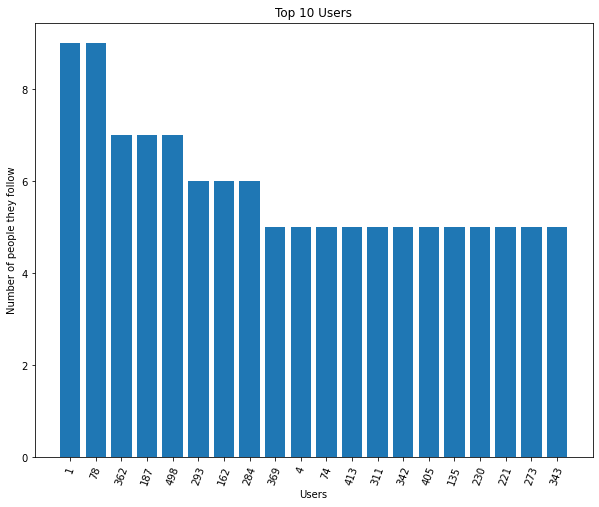

In [13]:
##Top 20 active users based on the number of people they follow
sorted(G.out_degree, key=lambda x: x[1], reverse=True)[:20]
rcParams['figure.figsize'] = 10, 8
top10_users=sorted(G.out_degree, key=lambda x: x[1], reverse=True)[:20]
plt.bar(range(len(top10_users)), [val[1] for val in top10_users], align='center')
plt.xticks(range(len(top10_users)), [val[0] for val in top10_users])
plt.xticks(rotation=70)
plt.title('Top 10 Users')
plt.xlabel('Users')
plt.ylabel('Number of people they follow')
plt.savefig('Top10Users')
plt.show()


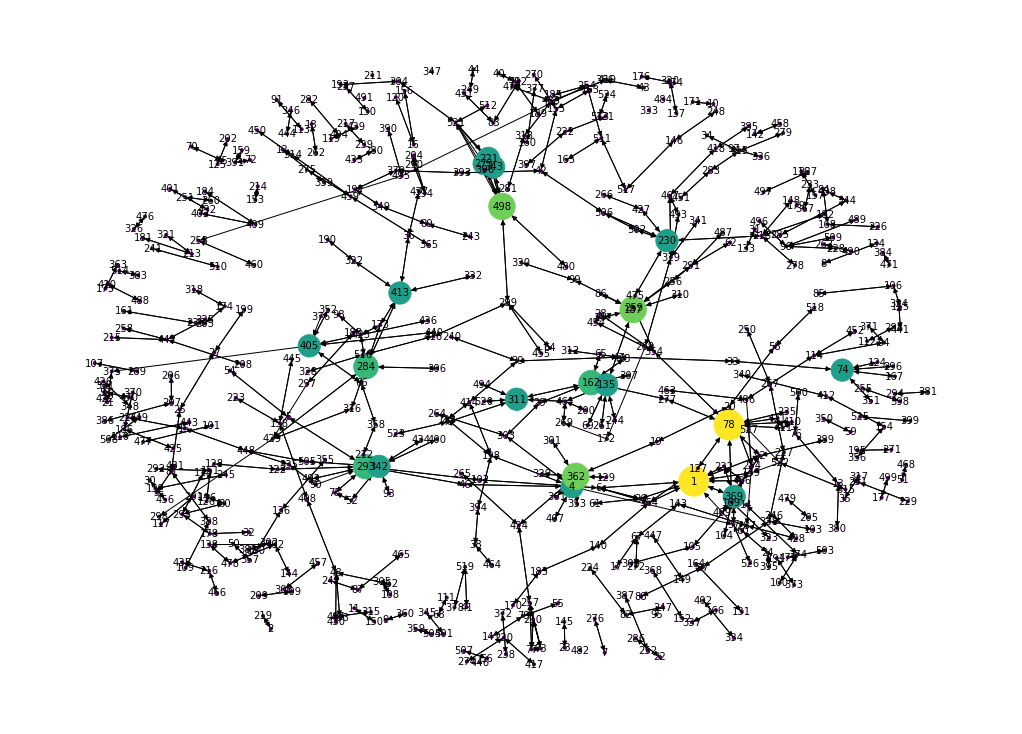

In [14]:
##visualize the network - out degree - most interested factor
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))

high_light_nodes = [val[0] for val in top10_users]
node_color = [20000.0 * G.out_degree(v) if v in high_light_nodes else 0 for v in G]
node_size = [100.0 * G.out_degree(v) if v in high_light_nodes else 10 for v in G] 
#node_size = [v * 10000 if k in high_light_nodes else 10 for k,v in zip(G,betCent.values())]

nx.draw(G, pos, node_color=node_color, 
        with_labels=True, 
        node_size=node_size,
        font_size=10,
        linewidths=0.8)

plt.savefig('Outdegree Network')

## Step 3: Identify key influencers 

In [15]:
##merge the centrality measurement into the same dataframe
in_degree_df=pd.DataFrame(G.in_degree,columns=['Person','In Degree'])
out_degree_df=pd.DataFrame(G.out_degree,columns=['Person','Out Degree'])
betCent_df=pd.DataFrame(betCent.items(), columns=['Person','Betweenness'])
cloCent_df=pd.DataFrame(cloCent.items(), columns=['Person','Closeness'])
Centrality_df=in_degree_df.merge(
    out_degree_df, 
    how='left', 
    on='Person').merge(
    betCent_df, 
    how='left', 
    on='Person').merge(
    cloCent_df,
    how='left',
    on='Person')

- ### Key influencers with the most followers

In [16]:
##generate Top20_indegree table
Top20_Indegree=Centrality_df.sort_values('In Degree',ascending=False).head(20).reset_index()
Top20_Indegree

,index,Person,In Degree,Out Degree,Betweenness,Closeness
0,0,1,10,9,0.009753,0.039458
1,167,78,9,9,0.014323,0.038792
2,22,293,7,6,0.013683,0.034854
3,53,362,7,7,0.001364,0.014156
4,190,187,7,7,0.007164,0.026811
5,378,521,7,3,0.000382,0.013799
6,377,498,6,7,0.000556,0.013799
7,74,162,6,6,0.018784,0.040216
8,313,284,6,6,0.000458,0.014905
9,8,369,5,5,0.001819,0.034644


In [17]:
##generate Top20_outdegree table
Top20_Outdegree=Centrality_df.sort_values('Out Degree',ascending=False).head(20).reset_index()
Top20_Outdegree

,index,Person,In Degree,Out Degree,Betweenness,Closeness
0,0,1,10,9,0.009753,0.039458
1,167,78,9,9,0.014323,0.038792
2,53,362,7,7,0.001364,0.014156
3,190,187,7,7,0.007164,0.026811
4,377,498,6,7,0.000556,0.013799
5,22,293,7,6,0.013683,0.034854
6,74,162,6,6,0.018784,0.040216
7,313,284,6,6,0.000458,0.014905
8,129,342,5,5,0.005343,0.024394
9,368,230,5,5,0.000844,0.011632


- ### Key active network contributors who follows the most people

In [18]:
##save the two tables as png
dfi.export(Top20_Outdegree, 'Top20_Outdegree.png')
dfi.export(Top20_Indegree, 'Top20_Indegree.png')

[0329/110839.984486:INFO:headless_shell.cc(659)] Written to file /var/folders/pb/6yhd532s4sg99gk4h46pc60m0000gn/T/tmprdu7git9/temp.png.
[0329/110843.261368:INFO:headless_shell.cc(659)] Written to file /var/folders/pb/6yhd532s4sg99gk4h46pc60m0000gn/T/tmpvj1iovc6/temp.png.


## Step 4: Identify the isolated people 

In [19]:
##People who are isolated from the network, no connection to anyone else
edge_df_zero=edge_df.query('Weight == 0.0')
edge_df_zero.groupby(['Source']).count().query('Weight==526')

,Target,Weight
Source,,
179,526,526
211,526,526
298,526,526
333,526,526
347,526,526
446,526,526
482,526,526
484,526,526
491,526,526
